**Gradient descent over linear regression**

Firstly generate dataset

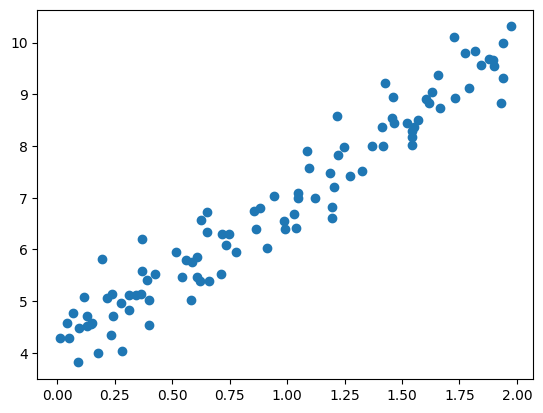

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)

# we'll never know the ground truth of nosie_sigma, b1 or b0
noise_sigma = 0.5
b1 = 3
b0 = 4

y = b0 + b1 * X + noise_sigma * np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

Check MSE from ideal case

In [16]:
def MSE(y_pred, y_truth) -> float:
    return np.mean((y_pred - y_truth) ** 2)

y_pred_ideal = b0 + b1 * X
print(f'MSE loss from an oracle: {MSE(y_pred_ideal, y)}')

MSE loss from an oracle: 0.2062766949769846


Linear regression from closed form solution(i.e. the normal Equation)

$
\hat{\theta} = (X^TX)^{-1} X^Ty
$

Note: This equation is for linear regression without bias parameter. To apply this equation, we just need to define an extra feature with fixed value '1' and the bias parameter will be the weight of this forged feature

Originia model: $y_{pred} = x * b_1 + b_0$

equivalent model: $y_{pred} = [x, 1] * [b_1, b_0]^T$

In [29]:
def linear_reg_closed_form(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

X_with_forged_feature = np.hstack([X, np.ones_like(X)])
params = linear_reg_closed_form(X_with_forged_feature, y)

b1_hat, b0_hat = params
y_pred_closed_form = b0_hat + b1_hat * X
print(f'MSE loss from linear regression of closed form: {MSE(y_pred_closed_form, y)}')
print(f'b1 from training {b1_hat}, b1 ground truth {b1}')
print(f'b0 from training {b0_hat}, b0 ground truth {b0}')

MSE loss from linear regression of closed form: 0.20164614099176345
b1 from training [2.88505669], b1 ground truth 3
b0 from training [4.10754808], b0 ground truth 4


Validation from sklearn approach

In [28]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True).fit(X, y)
print(f"Mse: {MSE(y, reg.predict(X))}")
print(f'b1 from training {reg.coef_}, b1 ground truth {b1}')
print(f'b0 from training {reg.intercept_}, b0 ground truth {b0}')

Mse: 0.20164614099176337
b1 from training [[2.88505669]], b1 ground truth 3
b0 from training [4.10754808], b0 ground truth 4


**Linear regression through gradient descent**

The math:

$
L = \frac{1}{n}\sum_{i=1}^n(y_i-x_{i}b_1 - b_0)^2
$

$
\frac{\partial L}{\partial b_1} = -\frac{2}{n}\sum_{i=1}^n x_{i}(y_i-x_{i}b_1 - b_0)
= -\frac{2}{n}\sum_{i=1}^n x_{i}(y_i-y_{i}^{(pred)})
$

$
\frac{\partial L}{\partial b_0} = -\frac{2}{n}\sum_{i=1}^n (y_i-x_{i}b_1 - b_0)
= -\frac{2}{n}\sum_{i=1}^n (y_i-y_{i}^{(pred)})
$

At epoch 10, loss 0.5598631630756618
At epoch 20, loss 0.3709071867236834
At epoch 30, loss 0.32100641348860415
At epoch 40, loss 0.2863967602878967
At epoch 50, loss 0.26182822278879997
At epoch 60, loss 0.24438196691952893
At epoch 70, loss 0.2319932276358893
At epoch 80, loss 0.22319587468761212
At epoch 90, loss 0.21694879682193968
At epoch 100, loss 0.21251269176969456
MSE: 0.21214698492831777
b1 from training [2.72041889], b1 ground truth 3
b0 from training [4.29401233], b0 ground truth 4


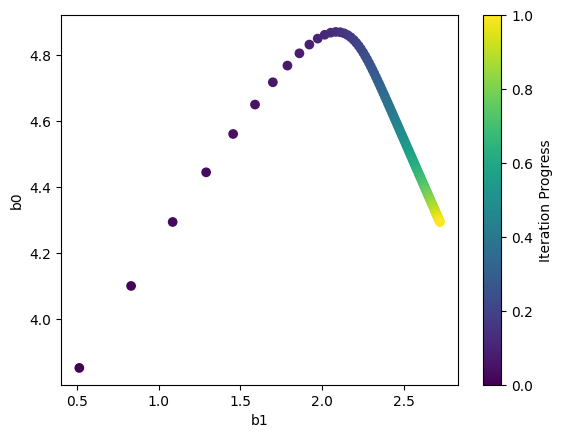

In [43]:
from typing import List


max_epochs = 100
learning_rate = 0.05

b_gd = np.random.randn(2, 1) # [b1, b0]
loss = []
b_gd_history = [b_gd.copy()]
for i in range(1, max_epochs+1):
    b1_gd, b0_gd = b_gd
    pred = X * b1_gd + b0_gd
    loss.append(MSE(y, pred))
   
    dLdb1 = (-2/m) * np.sum(X*(y-pred))
    dLdb0 = (-2/m) * np.sum(y-pred)
    gradient = np.array([dLdb1, dLdb0]).reshape(2, 1)

    b_gd -= learning_rate*gradient
    b_gd_history.append(b_gd.copy())

    if i%10 == 0:
        print(f'At epoch {i}, loss {loss[-1]}')

print(f"MSE: {MSE(y, X * b1_gd + b0_gd)}")
print(f'b1 from training {b1_gd}, b1 ground truth {b1}')
print(f'b0 from training {b0_gd}, b0 ground truth {b0}')



# Visualize the evolution of b_gd over time
b_gd_history = np.hstack(b_gd_history)  # Stack history horizontally for plotting

# Create a colormap based on iteration index
num_points = len(b_gd_history[0, :])  # Number of points in history
iterations = np.linspace(0, 1, num_points)  # Create a normalized array for the colormap
colors = plt.cm.viridis(iterations)  # Use a colormap (viridis)

plt.scatter(b_gd_history[0, :], b_gd_history[1, :], c=iterations, cmap='viridis')
plt.colorbar(label='Iteration Progress')  # Add colorbar to show iteration progress
plt.xlabel('b1')
plt.ylabel('b0')
plt.show()